<a href="https://colab.research.google.com/github/Sudharsanam63/Research-Project/blob/main/Zcash_R%26D_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Dense, Dropout,Input, concatenate
from math import sqrt

## Load your cryptocurrency price dataset (replace 'your_cryptocurrency_data.csv' with your dataset file)
data = pd.read_csv('/content/drive/MyDrive/R&D Sudharsanam G/Dataset/Zcash Historical Data - Investing.com India (1).csv')

# Remove rows where 'Volume' column contains '-'
data = data[data['Volume'] != '-']

# Remove rows where any column has null values
data = data.dropna()

# Define a function to convert 'Volume' values like '1.04B' to numerical format
def convert_volume(value):
    if value.endswith('K'):
        return float(value[:-1]) * 1000
    elif value.endswith('M'):
        return float(value[:-1]) * 1000000
    elif value.endswith('B'):
        return float(value[:-1]) * 1000000000
    else:
        return float(value)

# Apply the convert_volume function to the 'Volume' column
data['Volume'] = data['Volume'].apply(convert_volume)


# Convert the date column to the 'YYYY-MM-DD' format
data['Date'] = pd.to_datetime(data['Date'], format='%b %d, %Y')
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')

# Preprocess the 'Change' column to convert it to a numerical format
data['Change %'] = data['Change %'].str.rstrip('%').astype('float') / 100.0
data.set_index('Date', inplace=True)

# Extract features and target
features = data[['High', 'Low', 'Open', 'Volume']].values
target = data['Price'].values.reshape(-1, 1)

# Normalize the features and target
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()
features_scaled = scaler_features.fit_transform(features)
target_scaled = scaler_target.fit_transform(target)

# Step 3: Prepare Sequences

def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

# Define the sequence length
sequence_length = 3
X, y = create_sequences(features_scaled, target_scaled, sequence_length)

# Step 4: Split Data into Training and Testing Sets
train_size = 1500
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 5: Build the Bi-LSTM Model
model = Sequential()

# Bi-LSTM layers
model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(sequence_length, features.shape[1])))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 6: Train the Model
batch_size = 64
epochs = 50
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

# Step 7: Evaluate the Model
bi_lstm_preds = model.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error)
bi_lstm_mse = mean_squared_error(y_test, bi_lstm_preds)
print(f"Bi-LSTM Mean Squared Error: {bi_lstm_mse}")

# Calculate RMSE for Bi-LSTM Model
bi_lstm_rmse = sqrt(bi_lstm_mse)
print(f"Bi-LSTM RMSE: {bi_lstm_rmse}")

# Calculate R-squared
bi_lstm_r2 = r2_score(y_test, bi_lstm_preds)
print(f"Bi-LSTM R-squared: {bi_lstm_r2}")

# Calculate Mean Absolute Error (MAE)
bi_lstm_mae = mean_absolute_error(y_test, bi_lstm_preds)
print(f"Bi-LSTM MAE: {bi_lstm_mae}")
bi_lstm_preds = scaler_target.inverse_transform(bi_lstm_preds)
y_test = scaler_target.inverse_transform(y_test)

Epoch 1/50
24/24 [==============================] - 9s 12ms/step - loss: 0.0114
Epoch 2/50
24/24 [==============================] - 0s 12ms/step - loss: 0.0013
Epoch 3/50
24/24 [==============================] - 0s 12ms/step - loss: 0.0011
Epoch 4/50
24/24 [==============================] - 0s 11ms/step - loss: 0.0011
Epoch 5/50
24/24 [==============================] - 0s 11ms/step - loss: 0.0010
Epoch 6/50
24/24 [==============================] - 0s 12ms/step - loss: 0.0010
Epoch 7/50
24/24 [==============================] - 0s 11ms/step - loss: 9.9649e-04
Epoch 8/50
24/24 [==============================] - 0s 11ms/step - loss: 0.0010
Epoch 9/50
24/24 [==============================] - 0s 11ms/step - loss: 9.9221e-04
Epoch 10/50
24/24 [==============================] - 0s 11ms/step - loss: 0.0010
Epoch 11/50
24/24 [==============================] - 0s 12ms/step - loss: 0.0011
Epoch 12/50
24/24 [==============================] - 0s 11ms/step - loss: 9.0739e-04
Epoch 13/50
24/24 [======

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Dense, Dropout,Input, concatenate
from math import sqrt

# Load your cryptocurrency price dataset (replace 'your_cryptocurrency_data.csv' with your dataset file)
data = pd.read_csv('/content/drive/MyDrive/R&D Sudharsanam G/Dataset/Zcash Historical Data - Investing.com India (1).csv')

# Remove rows where 'Volume' column contains '-'
data = data[data['Volume'] != '-']

# Remove rows where any column has null values
data = data.dropna()

# Define a function to convert 'Volume' values like '1.04B' to numerical format
def convert_volume(value):
    if value.endswith('K'):
        return float(value[:-1]) * 1000
    elif value.endswith('M'):
        return float(value[:-1]) * 1000000
    elif value.endswith('B'):
        return float(value[:-1]) * 1000000000
    else:
        return float(value)

# Apply the convert_volume function to the 'Volume' column
data['Volume'] = data['Volume'].apply(convert_volume)


# Convert the date column to the 'YYYY-MM-DD' format
data['Date'] = pd.to_datetime(data['Date'], format='%b %d, %Y')
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')

# Preprocess the 'Change' column to convert it to a numerical format
data['Change %'] = data['Change %'].str.rstrip('%').astype('float') / 100.0
data.set_index('Date', inplace=True)


# Extract features and target
features = data[['High', 'Low', 'Open', 'Volume']].values
target = data['Price'].values.reshape(-1, 1)

# Normalize the features and target
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()
features_scaled = scaler_features.fit_transform(features)
target_scaled = scaler_target.fit_transform(target)

# Step 3: Prepare Sequences

def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

# Define the sequence length
sequence_length = 3
X, y = create_sequences(features_scaled, target_scaled, sequence_length)

# Step 4: Split Data into Training and Testing Sets
train_size = 1500
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 5: Build the Bi-GRU Model
model = Sequential()

# Bi-GRU layers
model.add(Bidirectional(GRU(units=50, return_sequences=True), input_shape=(sequence_length, features.shape[1])))
model.add(Bidirectional(GRU(units=50)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 6: Train the Model
batch_size = 64
epochs = 50
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

# Step 7: Evaluate the Bi-GRU Model
bi_gru_preds = model.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error)
bi_gru_mse = mean_squared_error(y_test, bi_gru_preds)
print(f"Bi-GRU Mean Squared Error: {bi_gru_mse}")

# Calculate RMSE for Bi-GRU Model
bi_gru_rmse = sqrt(bi_gru_mse)
print(f"Bi-GRU RMSE: {bi_gru_rmse}")

# Calculate R-squared
bi_gru_r2 = r2_score(y_test, bi_gru_preds)
print(f"Bi-GRU R-squared: {bi_gru_r2}")

# Calculate Mean Absolute Error (MAE)
bi_gru_mae = mean_absolute_error(y_test, bi_gru_preds)
print(f"Bi-GRU MAE: {bi_gru_mae}")
bi_gru_preds = scaler_target.inverse_transform(bi_gru_preds)
y_test = scaler_target.inverse_transform(y_test)

Epoch 1/50
24/24 [==============================] - 9s 12ms/step - loss: 0.0070
Epoch 2/50
24/24 [==============================] - 0s 11ms/step - loss: 0.0016
Epoch 3/50
24/24 [==============================] - 0s 11ms/step - loss: 0.0011
Epoch 4/50
24/24 [==============================] - 0s 11ms/step - loss: 9.7125e-04
Epoch 5/50
24/24 [==============================] - 0s 12ms/step - loss: 9.8418e-04
Epoch 6/50
24/24 [==============================] - 0s 11ms/step - loss: 9.7920e-04
Epoch 7/50
24/24 [==============================] - 0s 11ms/step - loss: 9.0618e-04
Epoch 8/50
24/24 [==============================] - 0s 11ms/step - loss: 8.7662e-04
Epoch 9/50
24/24 [==============================] - 0s 11ms/step - loss: 8.7019e-04
Epoch 10/50
24/24 [==============================] - 0s 11ms/step - loss: 8.5497e-04
Epoch 11/50
24/24 [==============================] - 0s 11ms/step - loss: 8.1094e-04
Epoch 12/50
24/24 [==============================] - 0s 11ms/step - loss: 8.4567e-04
E

             Price    Open    High     Low    Volume  Change %
Date                                                          
2016-11-04  614.37  871.00  900.00  605.00    1690.0   -0.2946
2016-11-05  505.00  614.37  650.00  505.00    1800.0   -0.1780
2016-11-06  344.57  505.00  509.46  320.00    3060.0   -0.3177
2016-11-07  231.53  344.57  358.35  231.53    3110.0   -0.3281
2016-11-08  270.00  231.53  290.35  180.00    3750.0    0.1662
...            ...     ...     ...     ...       ...       ...
2023-09-28   26.44   26.05   26.45   25.92   74880.0    0.0150
2023-09-29   26.69   26.44   27.03   26.39   97370.0    0.0095
2023-09-30   26.92   26.69   27.25   26.56   53650.0    0.0084
2023-10-01   28.06   26.92   28.22   26.89   77140.0    0.0425
2023-10-02   27.31   28.06   28.28   27.04  114490.0   -0.0266

[2522 rows x 6 columns]
Epoch 1/50
24/24 [==============================] - 9s 11ms/step - loss: 0.0151
Epoch 2/50
24/24 [==============================] - 0s 12ms/step - loss: 0.0

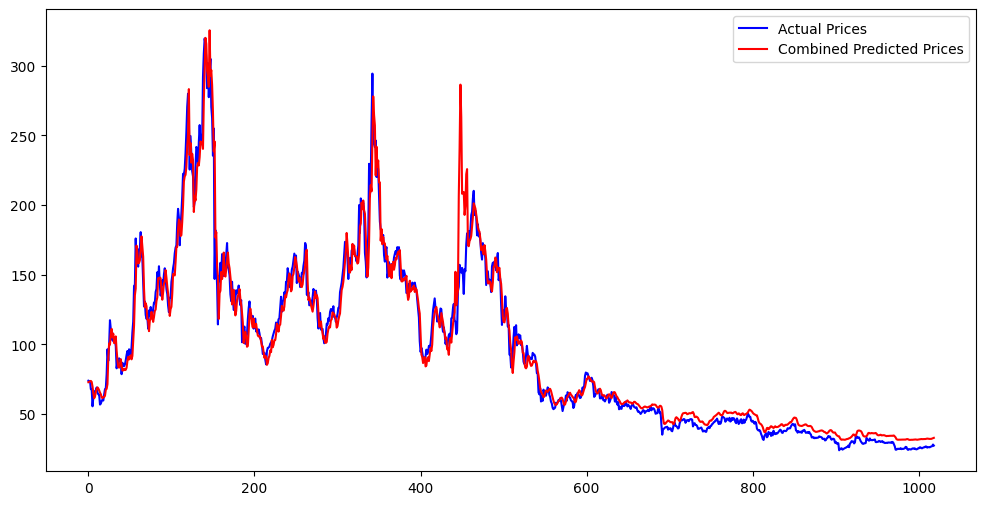

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Dense, Input, concatenate
from math import sqrt

# Load your cryptocurrency price dataset (replace 'your_cryptocurrency_data.csv' with your dataset file)
data = pd.read_csv('/content/drive/MyDrive/R&D Sudharsanam G/Dataset/Zcash Historical Data - Investing.com India (1).csv')

# Remove rows where 'Volume' column contains '-'
data = data[data['Volume'] != '-']

# Remove rows where any column has null values
data = data.dropna()

# Define a function to convert 'Volume' values like '1.04B' to numerical format
def convert_volume(value):
    if value.endswith('K'):
        return float(value[:-1]) * 1000
    elif value.endswith('M'):
        return float(value[:-1]) * 1000000
    elif value.endswith('B'):
        return float(value[:-1]) * 1000000000
    else:
        return float(value)

# Apply the convert_volume function to the 'Volume' column
data['Volume'] = data['Volume'].apply(convert_volume)


# Convert the date column to the 'YYYY-MM-DD' format
data['Date'] = pd.to_datetime(data['Date'], format='%b %d, %Y')
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')

# Preprocess the 'Change' column to convert it to a numerical format
data['Change %'] = data['Change %'].str.rstrip('%').astype('float') / 100.0
data.set_index('Date', inplace=True)

# Extract features and targetd
features = data[['High', 'Low', 'Open', 'Volume']].values
target = data['Price'].values.reshape(-1, 1)

print(data)
# Normalize the features and target
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()
features_scaled = scaler_features.fit_transform(features)
target_scaled = scaler_target.fit_transform(target)

# Step 3: Prepare Sequences

def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

# Define the sequence length
sequence_length = 3

X, y = create_sequences(features_scaled, target_scaled, sequence_length)

# Step 4: Split Data into Training and Testing Sets

train_size = 1500
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 5: Build the Bi-LSTM Model

bi_lstm_model = Sequential()

# Bi-LSTM layers
bi_lstm_model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(sequence_length, features.shape[1])))
bi_lstm_model.add(Bidirectional(LSTM(units=50)))
bi_lstm_model.add(Dense(units=1))

bi_lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Step 6: Train the Bi-LSTM Model
batch_size = 64
epochs = 50
bi_lstm_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

# Step 8: Build the Bi-GRU Model
bi_gru_model = Sequential()

# Bi-GRU layers
bi_gru_model.add(Bidirectional(GRU(units=50, return_sequences=True), input_shape=(sequence_length, features.shape[1])))
bi_gru_model.add(Bidirectional(GRU(units=50)))
bi_gru_model.add(Dense(units=1))

bi_gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Step 9: Train the Bi-GRU Model
bi_gru_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

# Define the input layer for both models
input_layer = Input(shape=(sequence_length, features.shape[1]))

# Define the output layers for both models
bi_lstm_output = bi_lstm_model(input_layer)
bi_gru_output = bi_gru_model(input_layer)

# Concatenate the outputs
combined_output = concatenate([bi_lstm_output, bi_gru_output])

# Add a Dense layer for further processing (you can customize units and activation)
combined_output = Dense(units=64, activation='relu')(combined_output)

# Add an additional Dense layer (you can customize units and activation)
combined_output = Dense(units=32, activation='relu')(combined_output)

# Add the final output layer
combined_output = Dense(units=1)(combined_output)

# Create the combined model
combined_model = Model(inputs=input_layer, outputs=combined_output)

# Compile the combined model
combined_model.compile(optimizer='adam', loss='mean_squared_error')

# Step 12: Train the Combined Model

combined_model.fit(X_train, y_train, epochs=  50, batch_size=batch_size, verbose=2)

# Step 13: Evaluate the Combined Model

combined_preds = combined_model.predict(X_test)  # Inverse transform predictions

# Calculate metrics for the combined model
combined_mse = mean_squared_error(y_test, combined_preds)
combined_rmse = sqrt(combined_mse)
combined_r2 = r2_score(y_test, combined_preds)
# Calculate MAE for the Combined Model
combined_mae = mean_absolute_error(y_test, combined_preds)

print("\nCombined Model Metrics:")
print(f"MSE: {combined_mse}")
print(f"RMSE: {combined_rmse}")
print(f"R-squared (R^2): {combined_r2}")
print(f"Combined Model MAE: {combined_mae}")

# Create a DataFrame with dates as the index
date_index = data.index[train_size + sequence_length:]
combined_preds_df = pd.DataFrame(combined_preds, index=date_index, columns=["Combined Predicted Price"])
y_test_df = pd.DataFrame(y_test, index=date_index, columns=["Actual Price"])

combined_preds = scaler_target.inverse_transform(combined_preds)
y_test = scaler_target.inverse_transform(y_test)

# Visualize the predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual Prices", color='blue')
plt.plot(combined_preds, label="Combined Predicted Prices", color='red')
plt.legend()
plt.show()


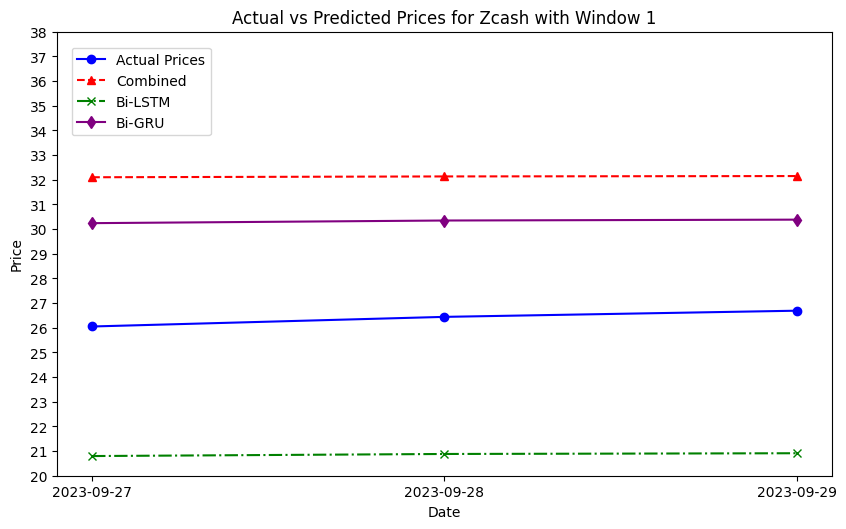

In [ ]:
# Define the list of dates you want to plot
dates_to_plot = [
    '2023-09-27',
    '2023-09-28',
    '2023-09-29'
]

# Find the corresponding indices of these dates in your data
date_indices = [date_index.get_loc(date) for date in dates_to_plot]

# Extract the actual prices and predicted prices for these dates
actual_prices = y_test[date_indices]
combined_predicted_prices = combined_preds[date_indices]
bi_lstm_predicted_prices = bi_lstm_preds[date_indices]
bi_gru_predicted_prices = bi_gru_preds[date_indices]

# Define markers for each model
markers = ['o', '^', 'x', 'd']  # You can customize this list with different markers

# Define line styles for each model (dashed lines)
line_styles = ['-', '--', '-.', '-']

# Set the figure size to a larger size
plt.figure(figsize=(10, 6))

# Create some extra space above the plot
plt.subplots_adjust(top=0.85)

# Plot the actual vs combined predicted vs Bi-LSTM vs Bi-GRU prices with different markers and dashed lines
plt.plot(dates_to_plot, actual_prices, label="Actual Prices", marker=markers[0], linestyle=line_styles[0], color='blue')
plt.plot(dates_to_plot, combined_predicted_prices, label="Combined", marker=markers[1], linestyle=line_styles[1], color='red')
plt.plot(dates_to_plot, bi_lstm_predicted_prices, label="Bi-LSTM", marker=markers[2], linestyle=line_styles[2], color='green')
plt.plot(dates_to_plot, bi_gru_predicted_prices, label="Bi-GRU", marker=markers[3], linestyle=line_styles[3], color='purple')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices for Zcash with Window 1')

# # Add additional Y-axis values with a difference of 5 from 50 to 80
plt.yticks(np.arange(20, 38+1, 1))

# Adjust the legend position to the upper left with some padding
plt.legend(loc='upper left', bbox_to_anchor=(0.01, 0.98))

# Save the plot as an image file (e.g., PNG or PDF) for inclusion in your research paper
plt.savefig('predicted_prices_plot.png', dpi=300, bbox_inches='tight')  # Specify the desired file format and DPI
plt.show()


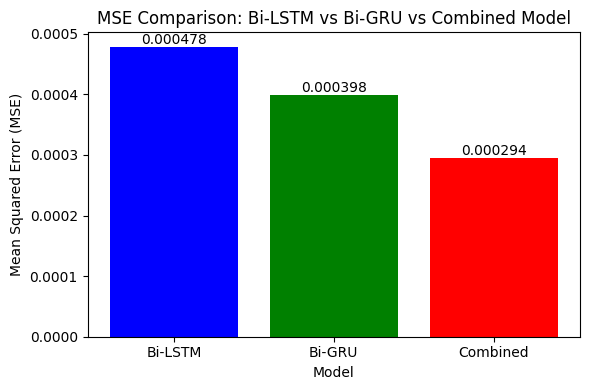

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the models and their corresponding MSE values
models = ['Bi-LSTM', 'Bi-GRU', 'Combined']
mse_values = [bi_lstm_mse, bi_gru_mse, combined_mse]

# Create a bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(models, mse_values, color=['blue', 'green', 'red'])
plt.title('MSE Comparison: Bi-LSTM vs Bi-GRU vs Combined Model')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')

# Add value labels on top of the bars
for bar, mse in zip(bars, mse_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mse:.6f}', ha='center', va='bottom')

# Reduce spacing between x-axis tick labels
plt.tight_layout()

# Save the plot as an image file (e.g., PNG or PDF) for inclusion in your research paper
plt.savefig('predicted_prices_plot.png', dpi=300)  # Specify the desired file format and DPI
plt.show()


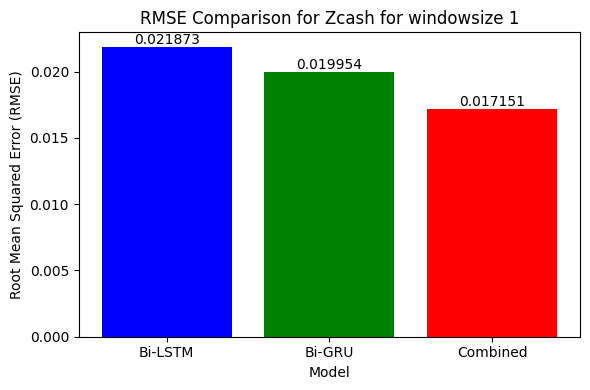

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the models and their corresponding MSE values
models = ['Bi-LSTM', 'Bi-GRU', 'Combined']
rmse_values = [bi_lstm_rmse, bi_gru_rmse, combined_rmse]

# Create a bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(models, rmse_values, color=['blue', 'green', 'red'])
plt.title('RMSE Comparison for Zcash for windowsize 1')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error (RMSE)')

# Add value labels on top of the bars
for bar, rmse in zip(bars, rmse_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{rmse:.6f}', ha='center', va='bottom')

# Reduce spacing between x-axis tick labels
plt.tight_layout()

# Save the plot as an image file (e.g., PNG or PDF) for inclusion in your research paper
plt.savefig('predicted_prices_plot.png', dpi=300)  # Specify the desired file format and DPI

plt.show()


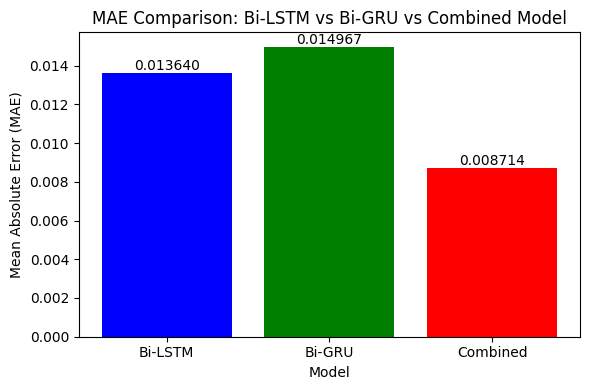

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the models and their corresponding MAE values
models = ['Bi-LSTM', 'Bi-GRU', 'Combined']
mae_values = [bi_lstm_mae, bi_gru_mae, combined_mae]

# Create a bar chart for MAE comparison
plt.figure(figsize=(6, 4))
bars = plt.bar(models, mae_values, color=['blue', 'green', 'red'])
plt.title('MAE Comparison: Bi-LSTM vs Bi-GRU vs Combined Model')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
# Add value labels on top of the bars
for bar, mae in zip(bars, mae_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mae:.6f}', ha='center', va='bottom')


# Reduce spacing between x-axis tick labels
plt.tight_layout()

# Save the plot as an image file (e.g., PNG or PDF) for inclusion in your research paper
plt.savefig('mae_comparison_plot.png', dpi=300)  # Specify the desired file format and DPI

plt.show()


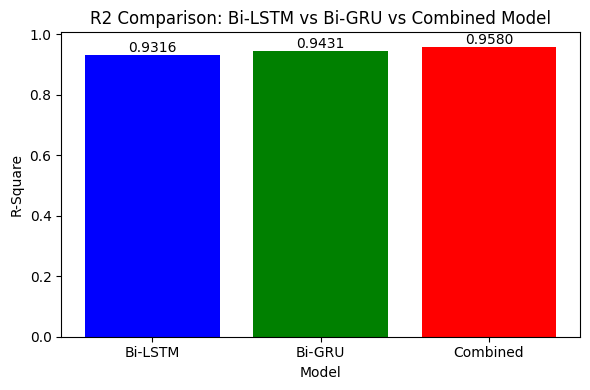

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the models and their corresponding R-squared values
models = ['Bi-LSTM', 'Bi-GRU', 'Combined']
r2_values = [bi_lstm_r2, bi_gru_r2, combined_r2]

# Create a vertical bar chart for R-squared comparison
plt.figure(figsize=(6, 4))
bars = plt.bar(models, r2_values, color=['blue', 'green', 'red'])
plt.title('R2 Comparison: Bi-LSTM vs Bi-GRU vs Combined Model')
plt.ylabel('R-Square')
plt.xlabel('Model')

# Add R-squared values as labels on the bars
for bar, r2 in zip(bars, r2_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2:.4f}', ha='center', va='bottom')

# Save the plot as an image file (e.g., PNG or PDF) for inclusion in your research paper
plt.tight_layout()
plt.savefig('r2_comparison_plot.png', dpi=300)  # Specify the desired file format and DPI

plt.show()
